# Intepretation

In [1]:
from config import plotly_id, plotly_key
import classifiers as clf

import pandas as pd
import plotly
import plotly.plotly as py
import plotly.graph_objs as go
import pickle

plotly.tools.set_credentials_file(username=plotly_id, api_key=plotly_key)

### Load Estimators

In [2]:
model_fws        = pd.read_pickle("../Data/model_fws.pkl")
model_fws_fs     = pd.read_pickle("../Data/model_fws_fs.pkl")
model_fws_fs_epa = pd.read_pickle("../Data/model_fws_fs_epa.pkl")
model_fws_fs_epa_smote = pd.read_pickle("../Data/model_fws_fs_epa_smote.pkl")
y_labels         = pd.read_pickle("../Data/y_labels.pkl")

### Confusion Matrix

In [3]:
# best estimators of test sets
best_estimators = pd.concat([
    model_fws[       model_fws['Split'] == 'Test'],
    model_fws_fs[    model_fws_fs['Split'] == 'Test'],
    model_fws_fs_epa[model_fws_fs_epa['Split'] == 'Test'],
    model_fws_fs_epa_smote[model_fws_fs_epa_smote['Split'] == 'Test']],
    ignore_index=True)

best_estimators

,Data,Classifier,Parameters,Split,Accuracy,Precision,Recall,F1 Score,Confusion Matrix
0,FWS,Dummy,{'strategy': 'most_frequent'},Test,0.761233,0.579476,0.761233,0.658035,"[[1728, 0, 0], [162, 0, 0], [380, 0, 0]]"
1,FWS,Logistic Regression,"{'C': 100.0, 'fit_intercept': True, 'multi_cla...",Test,0.787665,0.720512,0.787665,0.724481,"[[1706, 0, 22], [149, 0, 13], [298, 0, 82]]"
2,FWS,Multinomial Naive Bayes,"{'alpha': 0.0, 'fit_prior': True}",Test,0.784581,0.753231,0.784581,0.739054,"[[1676, 30, 22], [126, 23, 13], [280, 18, 82]]"
3,FWS,K Nearest Neighbors,"{'algorithm': 'ball_tree', 'leaf_size': 200}",Test,0.779736,0.727587,0.779736,0.734440,"[[1657, 7, 64], [131, 7, 24], [265, 9, 106]]"
4,FWS,Decision Tree,"{'criterion': 'gini', 'min_impurity_decrease':...",Test,0.786344,0.718726,0.786344,0.721851,"[[1707, 0, 21], [149, 0, 13], [302, 0, 78]]"
5,FWS,Random Forest,"{'min_impurity_decrease': 0.01, 'n_estimators'...",Test,0.761233,0.579476,0.761233,0.658035,"[[1728, 0, 0], [162, 0, 0], [380, 0, 0]]"
6,FWS,Ada Boost,"{'learning_rate': 0.5, 'n_estimators': 300}",Test,0.787665,0.720512,0.787665,0.724481,"[[1706, 0, 22], [149, 0, 13], [298, 0, 82]]"
7,FWS_FS,Dummy,{'strategy': 'most_frequent'},Test,0.761233,0.579476,0.761233,0.658035,"[[1728, 0, 0], [162, 0, 0], [380, 0, 0]]"
8,FWS_FS,Logistic Regression,"{'C': 100.0, 'fit_intercept': True, 'multi_cla...",Test,0.787665,0.720512,0.787665,0.724481,"[[1706, 0, 22], [149, 0, 13], [298, 0, 82]]"
9,FWS_FS,Multinomial Naive Bayes,"{'alpha': 0.0, 'fit_prior': True}",Test,0.784581,0.753231,0.784581,0.739054,"[[1676, 30, 22], [126, 23, 13], [280, 18, 82]]"


In [4]:
# plot accuracy
accuracy = best_estimators.pivot(index='Classifier',columns='Data',values='Accuracy')
accuracy = accuracy[['FWS', 'FWS_FS', 'FWS_FS_EPA', 'FWS_FS_EPA_SMOTE']]
accuracy

Data,FWS,FWS_FS,FWS_FS_EPA,FWS_FS_EPA_SMOTE
Classifier,,,,
Ada Boost,0.787665,0.787665,0.787225,0.597797
Decision Tree,0.786344,0.786344,0.786344,0.676211
Dummy,0.761233,0.761233,0.761233,0.335242
K Nearest Neighbors,0.779736,0.760793,0.768722,0.680176
Logistic Regression,0.787665,0.787665,0.787665,0.617621
Multinomial Naive Bayes,0.784581,0.784581,0.784581,0.611894
Random Forest,0.761233,0.761233,0.761233,0.629956


In [5]:
# plot F1 scores
f1_scores = best_estimators.pivot(index='Classifier',columns='Data',values='F1 Score')
f1_scores = f1_scores[['FWS', 'FWS_FS', 'FWS_FS_EPA', 'FWS_FS_EPA_SMOTE']]
f1_scores

Data,FWS,FWS_FS,FWS_FS_EPA,FWS_FS_EPA_SMOTE
Classifier,,,,
Ada Boost,0.724481,0.724654,0.724606,0.640137
Decision Tree,0.721851,0.721851,0.721851,0.706695
Dummy,0.658035,0.658035,0.658035,0.403189
K Nearest Neighbors,0.734440,0.717845,0.722568,0.684886
Logistic Regression,0.724481,0.724481,0.724481,0.656758
Multinomial Naive Bayes,0.739054,0.739054,0.739054,0.654658
Random Forest,0.658035,0.658035,0.658035,0.669199


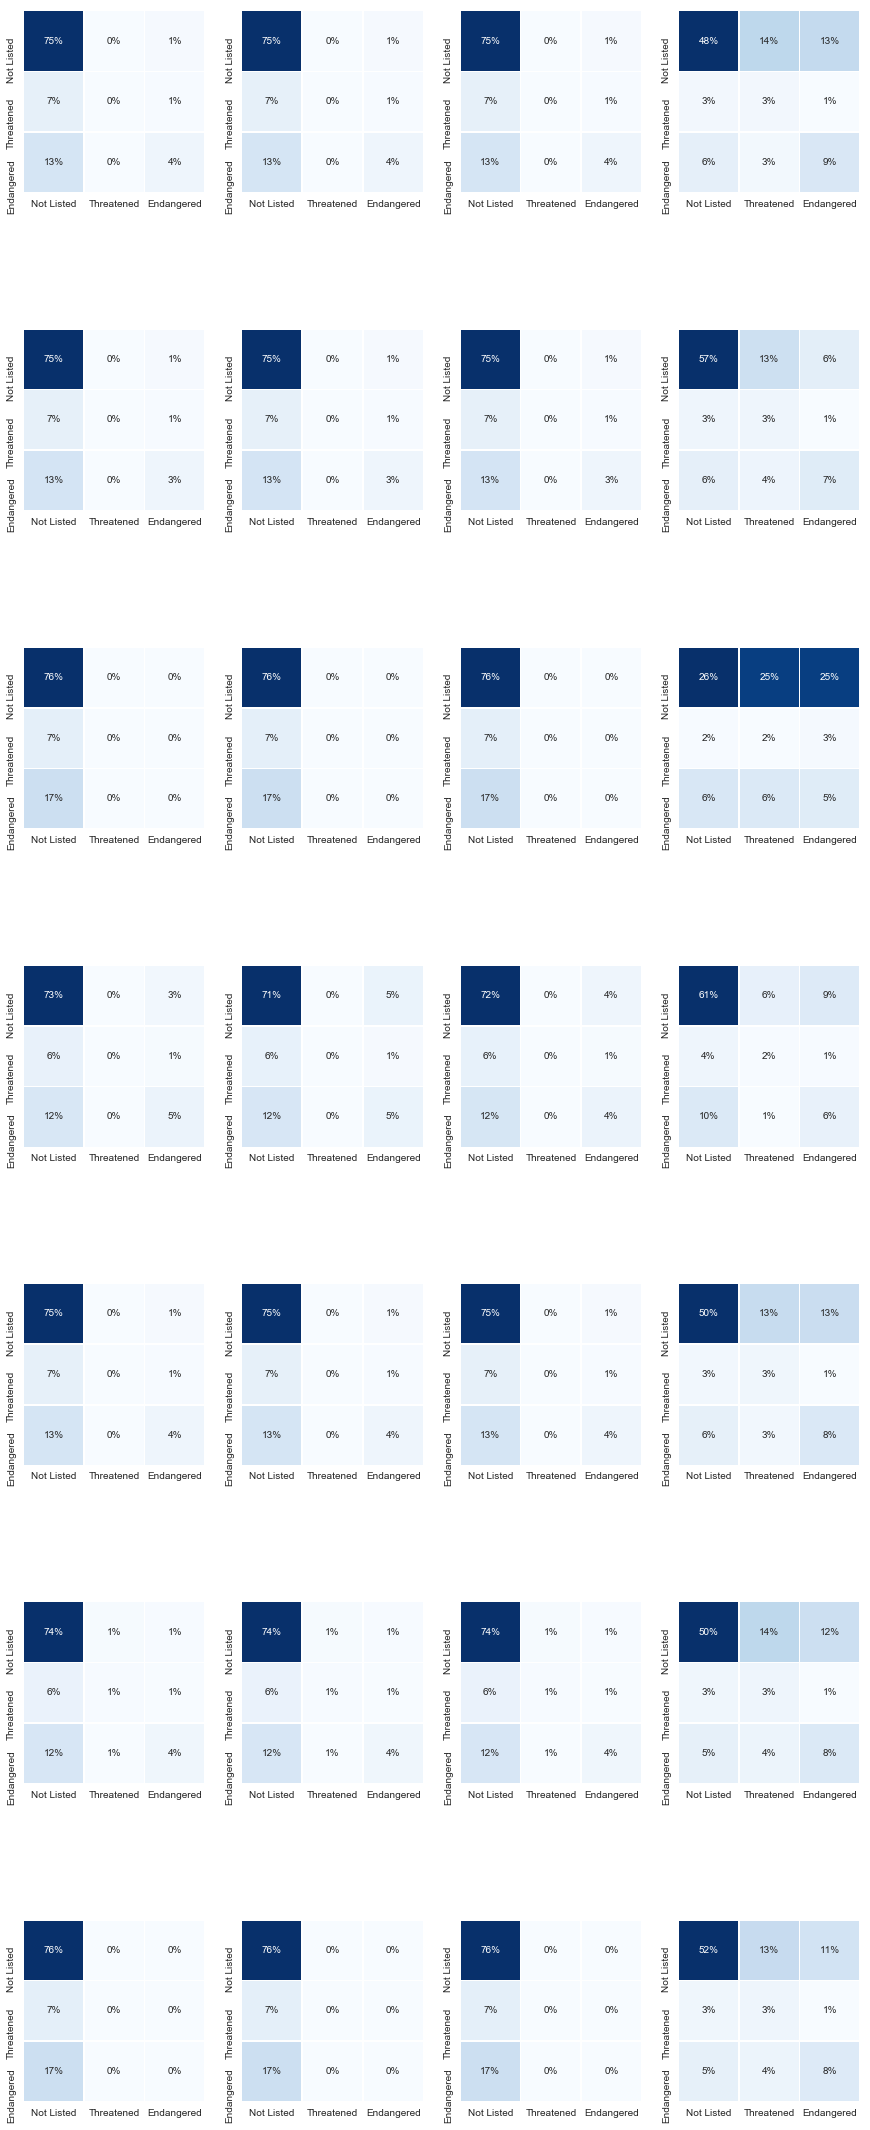

In [6]:
# plot confusion matrices
confusion_matrices = best_estimators.pivot(index='Classifier',columns='Data',values='Confusion Matrix')
confusion_matrices = confusion_matrices[['FWS', 'FWS_FS', 'FWS_FS_EPA', 'FWS_FS_EPA_SMOTE']]
cm, axes = clf.plot_confusion_matrices(confusion_matrices, list(y_labels[0]))

### Feature Importance

In [7]:
grid_searches[0]['Classifier'].best_estimator_.coef_[0]

NameError: name 'grid_searches' is not defined

In [ ]:
best_log_params = list(zip(X.columns, grid_searches[0]['Classifier'].best_estimator_.coef_[0]))
best_log_params.sort(key = lambda x: abs(x[1]), reverse=True)
best_log_params

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline  

# Rearrange feature names so they match the sorted feature importances
model_features = [i[0] for i in best_log_params]

feature_weights = [abs(i[1]) for i in best_log_params]

# Create plot
plt.figure(figsize=(10,6))

# Create plot title
plt.title("Feature Importance")

# Add bars
plt.bar(model_features, feature_weights)

# Add feature names as x-axis labels
# plt.xticks(range(X.shape[1]), names, rotation=90)
plt.xticks(rotation=90)

# Show plot
plt.show()

### Classifier Performance

In [ ]:
# create performance visualization in Plotly
hover_text  = []
color_range = []

for index, row in baseline.iterrows():
    hover_text.append(('Parameters: {params}<br>'+
                       'Split: {split}').format(params=row['Parameters'],
                                                split=row['Split']))
#    color_range.append(min(row['Dogs per Store'],120))

trace0 = go.Scatter(
    x=baseline['Accuracy'],
    y=baseline['F1 Score'],
    text=hover_text,
    mode='markers',
    marker=dict(
#        size=bcg_matrix['Stores'],
#        color=color_range,
        showscale=True,
        reversescale=True,
        colorbar=dict(
                title='Dogs Per Store'
            ),
        colorscale='RdBu'
    )
)

data = [trace0]
layout = go.Layout(
    title='Baseline',
    xaxis=dict(
        title='Model Performance Metric [Accuracy]',
        gridcolor='rgb(255, 255, 255)',
        zerolinewidth=1,
        ticklen=5,
        gridwidth=2,
    ),
    yaxis=dict(
        title='Model Performance Metric [F1 Score]',
        gridcolor='rgb(255, 255, 255)',
        zerolinewidth=1,
        ticklen=5,
        gridwidth=2,
    ),
    paper_bgcolor='rgb(243, 243, 243)',
    plot_bgcolor='rgb(243, 243, 243)',
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='endangered-species')